In [1]:
import pandas as pd
import numpy as np
import statistics
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pickle

## Importing and Reading the Combined Data

In [2]:
df = pd.read_csv('combined.csv')
df

,latitude,longitude,block_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
0,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2015-01,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,04 TO 06,74.0,Improved,1979,388000.0,63,55
1,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2016-03,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,350000.0,62,55
2,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-04,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,340000.0,61 years 05 months,55
3,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-05,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,322000.0,61 years 05 months,55
4,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-06,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,370000.0,61 years 03 months,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218210,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-02,BUKIT MERAH,5 ROOM,9B,BOON TIONG RD,25 TO 27,112.0,Improved,2016,1290000.0,91 years 11 months,92
218211,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-05,BUKIT MERAH,5 ROOM,9B,BOON TIONG RD,07 TO 09,112.0,Improved,2016,1278000.0,91 years 09 months,92
218212,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-08,BUKIT MERAH,5 ROOM,9B,BOON TIONG RD,22 TO 24,112.0,Improved,2016,1325000.0,91 years 05 months,92
218213,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-12,BUKIT MERAH,5 ROOM,9B,BOON TIONG RD,19 TO 21,112.0,Improved,2016,1400000.0,91 years 02 months,92


In [3]:
df.dtypes

latitude               float64
longitude              float64
block_no                object
road_name               object
postal_code              int64
address                 object
cbd_dist               float64
min_dist_mrt           float64
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
lease_remain_years       int64
dtype: object

In [4]:
df.isnull().sum()

latitude               0
longitude              0
block_no               0
road_name              0
postal_code            0
address                0
cbd_dist               0
min_dist_mrt           0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
lease_remain_years     0
dtype: int64

In [5]:

def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median

df['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))
df

,latitude,longitude,block_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years,storey_median
0,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2015-01,KALLANG/WHAMPOA,...,1,BEACH RD,04 TO 06,74.0,Improved,1979,388000.0,63,55,5.0
1,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2016-03,KALLANG/WHAMPOA,...,1,BEACH RD,07 TO 09,68.0,Improved,1979,350000.0,62,55,8.0
2,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-04,KALLANG/WHAMPOA,...,1,BEACH RD,07 TO 09,68.0,Improved,1979,340000.0,61 years 05 months,55,8.0
3,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-05,KALLANG/WHAMPOA,...,1,BEACH RD,07 TO 09,68.0,Improved,1979,322000.0,61 years 05 months,55,8.0
4,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-06,KALLANG/WHAMPOA,...,1,BEACH RD,07 TO 09,68.0,Improved,1979,370000.0,61 years 03 months,55,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218210,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-02,BUKIT MERAH,...,9B,BOON TIONG RD,25 TO 27,112.0,Improved,2016,1290000.0,91 years 11 months,92,26.0
218211,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-05,BUKIT MERAH,...,9B,BOON TIONG RD,07 TO 09,112.0,Improved,2016,1278000.0,91 years 09 months,92,8.0
218212,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-08,BUKIT MERAH,...,9B,BOON TIONG RD,22 TO 24,112.0,Improved,2016,1325000.0,91 years 05 months,92,23.0
218213,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-12,BUKIT MERAH,...,9B,BOON TIONG RD,19 TO 21,112.0,Improved,2016,1400000.0,91 years 02 months,92,20.0


In [6]:
scope_df = df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']]
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,2715.822202,457.092359,74.0,55,5.0,388000.0
1,2715.822202,457.092359,68.0,55,8.0,350000.0
2,2715.822202,457.092359,68.0,55,8.0,340000.0
3,2715.822202,457.092359,68.0,55,8.0,322000.0
4,2715.822202,457.092359,68.0,55,8.0,370000.0
...,...,...,...,...,...,...
218210,2525.251132,182.864524,112.0,92,26.0,1290000.0
218211,2525.251132,182.864524,112.0,92,8.0,1278000.0
218212,2525.251132,182.864524,112.0,92,23.0,1325000.0
218213,2525.251132,182.864524,112.0,92,20.0,1400000.0


In [7]:
scope_df = scope_df.drop_duplicates()
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,2715.822202,457.092359,74.0,55,5.0,388000.0
1,2715.822202,457.092359,68.0,55,8.0,350000.0
2,2715.822202,457.092359,68.0,55,8.0,340000.0
3,2715.822202,457.092359,68.0,55,8.0,322000.0
4,2715.822202,457.092359,68.0,55,8.0,370000.0
...,...,...,...,...,...,...
218210,2525.251132,182.864524,112.0,92,26.0,1290000.0
218211,2525.251132,182.864524,112.0,92,8.0,1278000.0
218212,2525.251132,182.864524,112.0,92,23.0,1325000.0
218213,2525.251132,182.864524,112.0,92,20.0,1400000.0


## Checking and Handling for Skewness in the data

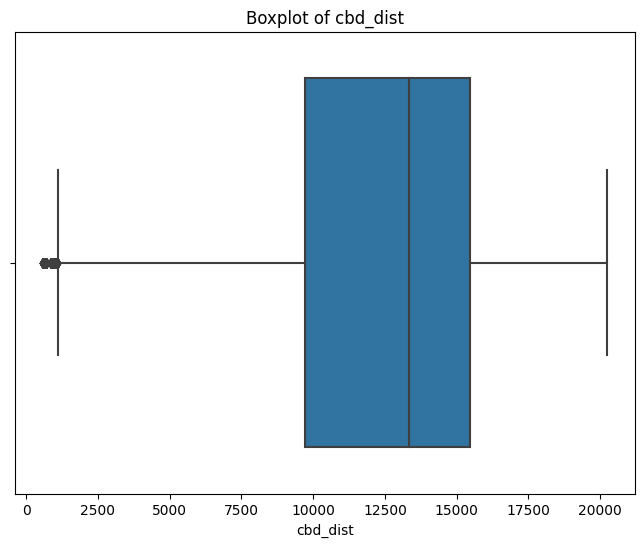

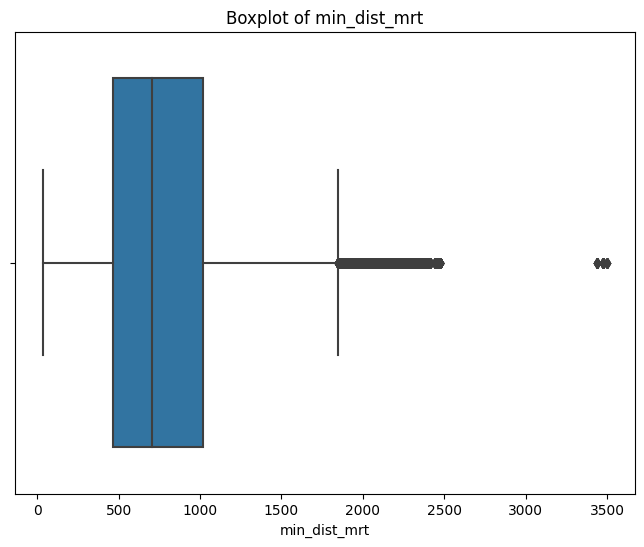

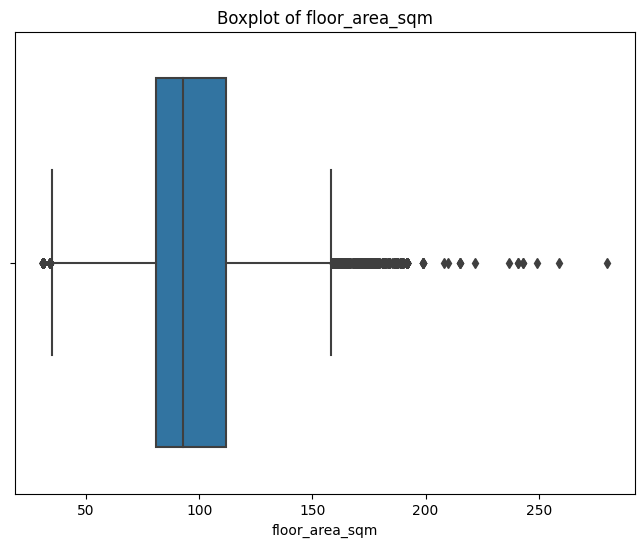

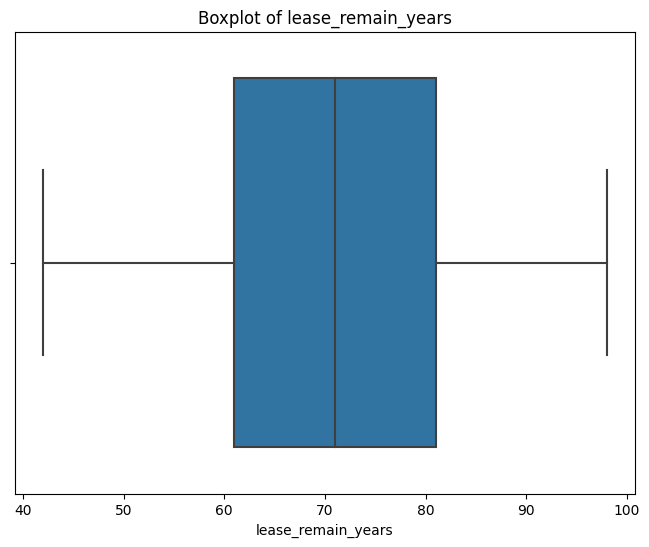

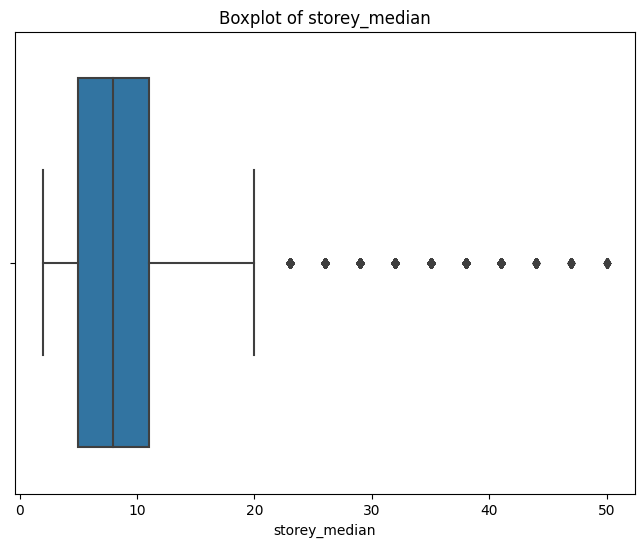

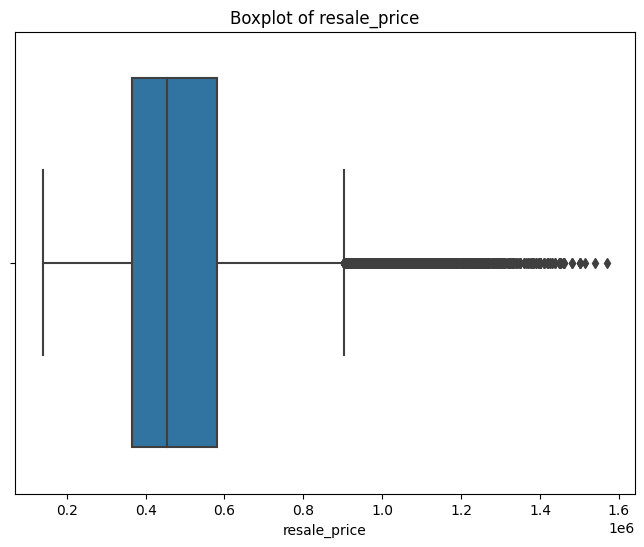

In [8]:

# List of columns(continuous variables) for finding skewness
col = ['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [9]:
df1 = scope_df

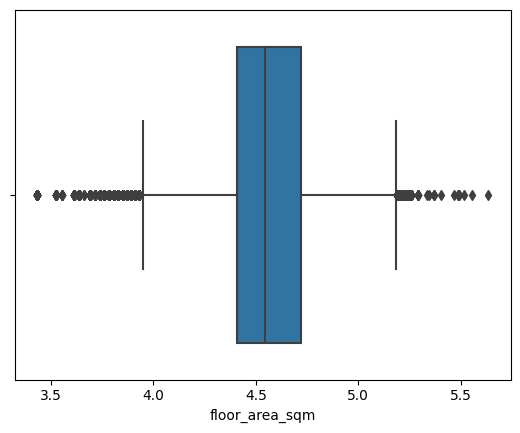

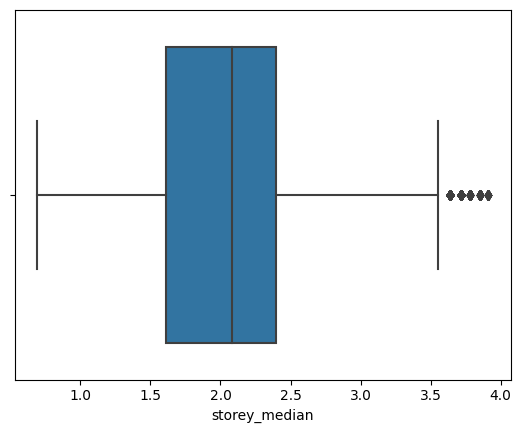

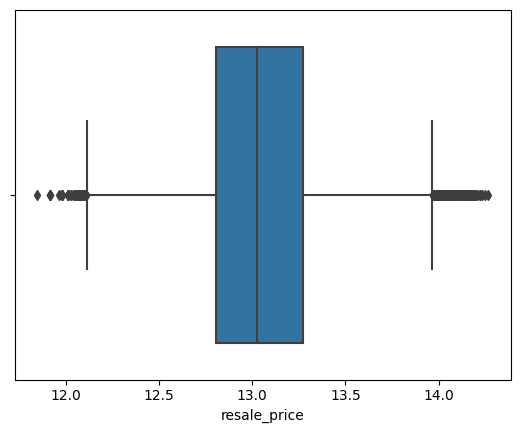

In [10]:
# Apply a logarithmic transformation to the required columns only.
# One need to apply it and check, in some cases it will handle the skewness, and in other cases it might not have a great 
# effect on the data, so no need to apply for that columns
    
df1['floor_area_sqm'] = np.log(df1['floor_area_sqm'])
sns.boxplot(x='floor_area_sqm', data=df1)
plt.show()

df1['storey_median'] = np.log(df1['storey_median'])
sns.boxplot(x='storey_median', data=df1)
plt.show()

df1['resale_price'] = np.log(df1['resale_price'])
sns.boxplot(x='resale_price', data=df1)
plt.show()

In [11]:
df1.dtypes

cbd_dist              float64
min_dist_mrt          float64
floor_area_sqm        float64
lease_remain_years      int64
storey_median         float64
resale_price          float64
dtype: object

## Visualization among different columns using Correlation Matrix

<Axes: title={'center': 'Correlation Heatmap'}>

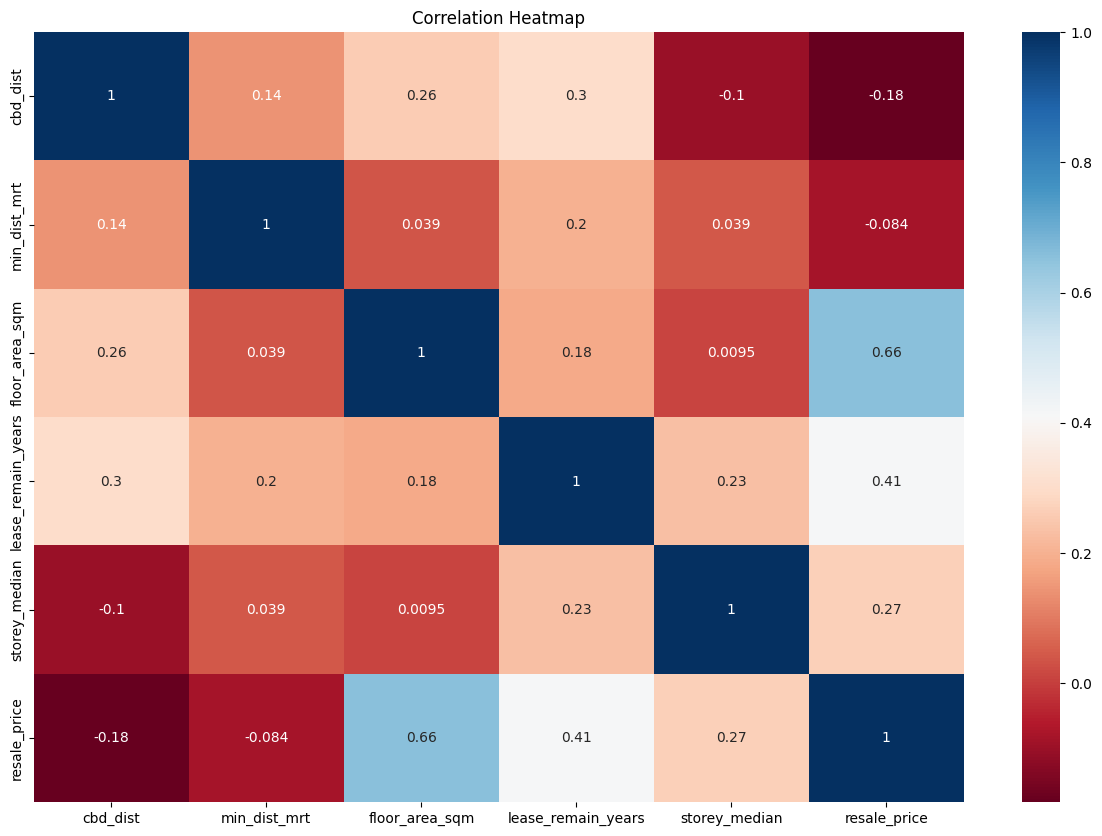

In [12]:


corrMatrix = df1.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)

## Encoding Data

In [13]:


X=df1[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']]
y=df1['resale_price']

# Normalizing the encoded data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
test_dataframe = pd.DataFrame(X)
test_dataframe

,0,1,2,3,4
0,-2.214038,-0.754565,-0.948356,-1.188740,-0.441973
1,-2.214038,-0.754565,-1.277869,-1.188740,0.212351
2,-2.214038,-0.754565,-1.277869,-1.188740,0.212351
3,-2.214038,-0.754565,-1.277869,-1.188740,0.212351
4,-2.214038,-0.754565,-1.277869,-1.188740,0.212351
...,...,...,...,...,...
211558,-2.257364,-1.380418,0.666660,1.528194,1.853235
211559,-2.257364,-1.380418,0.666660,1.528194,0.212351
211560,-2.257364,-1.380418,0.666660,1.528194,1.682552
211561,-2.257364,-1.380418,0.666660,1.528194,1.487980


## Splitting the data for training and testing purposes

In [15]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### ML Models

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGradient Boosting" : xgb.XGBRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = model.predict(X_test)

    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Print results for current model
    print(f"** Results for {model_name} Model **")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print("-"*80)



** Results for Linear Regression Model **
Mean Squared Error: 0.0262
R-squared: 0.7609
Mean Absolute Error: 0.1327
Root Mean Squared Error: 0.1619
--------------------------------------------------------------------------------
** Results for Decision Tree Model **
Mean Squared Error: 0.0232
R-squared: 0.7882
Mean Absolute Error: 0.1179
Root Mean Squared Error: 0.1524
--------------------------------------------------------------------------------
** Results for Random Forest Model **
Mean Squared Error: 0.0187
R-squared: 0.8299
Mean Absolute Error: 0.1078
Root Mean Squared Error: 0.1366
--------------------------------------------------------------------------------
** Results for Gradient Boosting Model **
Mean Squared Error: 0.0196
R-squared: 0.8212
Mean Absolute Error: 0.1144
Root Mean Squared Error: 0.1400
--------------------------------------------------------------------------------
** Results for XGradient Boosting Model **
Mean Squared Error: 0.0156
R-squared: 0.8581
Mean Abs

In [17]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}

# Initialize the XGBoost regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (negative MSE): {:.2f}".format(grid_search.best_score_))

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate on test data (optional)
test_accuracy = best_model.score(X_test, y_test)
print("Test set accuracy of best model: {:.2f}".format(test_accuracy))
print("Best hyperparameters:", grid_search.best_params_)

y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best cross-validation score (negative MSE): -0.02
Test set accuracy of best model: 0.86
Best hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
 
Mean squared error: 0.015215678835498764
Mean Absolute Error 0.0999964043793925
Root Mean squared error: 0.12335184974494207
 
R-squared: 0.861262014641825


## Testing Our Trained Model (Xgboost Regressor)


In [18]:
new_sample = np.array([[8740, 999, np.log(44), 55, np.log(11)]])
new_sample = scaler.transform(new_sample[:, :5])
new_pred = best_model.predict(new_sample)[0]
np.exp(new_pred)

235688.44

In [19]:
# Saving the model

with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)